In [23]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
audio_path = './data/genres/blues/blues.00000.au'
y, sr = librosa.load(audio_path)

In [15]:
print(y)
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f'%(len(y)/sr)) # 음악의 길이(초) = 음파의 길이(y)/Sampling rate(sr)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
661794
Sampling rate (Hz): 22050
Audio length (seconds): 30.01


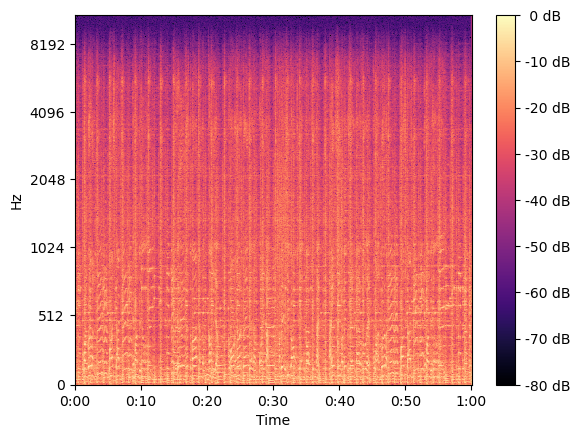

In [28]:
# STFT(Short Time Fourier Transform)
stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()


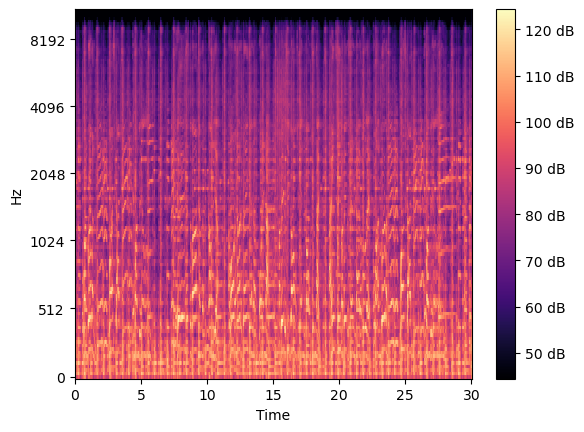

In [31]:
# Mel Spectrogram 생성
D = np.abs(librosa.stft(y, n_fft=4096, win_length=4096, hop_length=512))
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=128, hop_length=512, win_length=4096)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.00002), sr=sr, hop_length=512, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

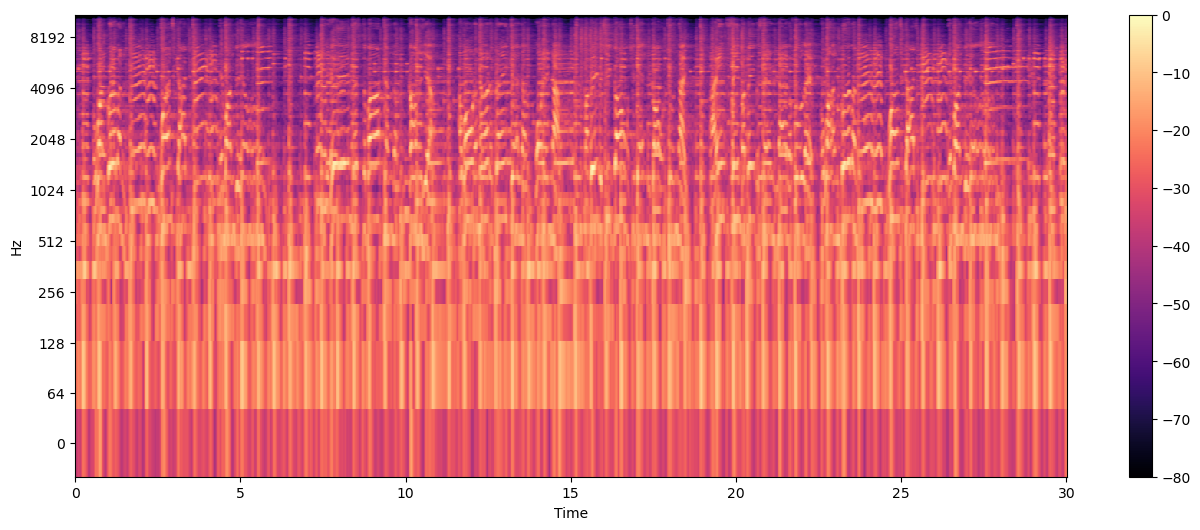

In [36]:
# MFCC 생성
D = np.abs(librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512))
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(D), sr=sr, n_mfcc=40)

S_DB = librosa.amplitude_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

In [39]:
# 오디오 특성 추출
tempo = librosa.beat.beat_track(y=y,sr=sr)
print(tempo)

(123.046875, array([  11,   32,   53,   73,   94,  114,  135,  156,  177,  197,  218,
        239,  260,  280,  301,  322,  343,  363,  384,  405,  426,  446,
        467,  488,  509,  529,  550,  570,  591,  612,  633,  653,  673,
        693,  713,  734,  755,  775,  796,  816,  837,  858,  878,  898,
        919,  940,  960,  981, 1002, 1022, 1043, 1064, 1085, 1105, 1126,
       1147, 1168, 1188, 1209, 1230, 1251]))


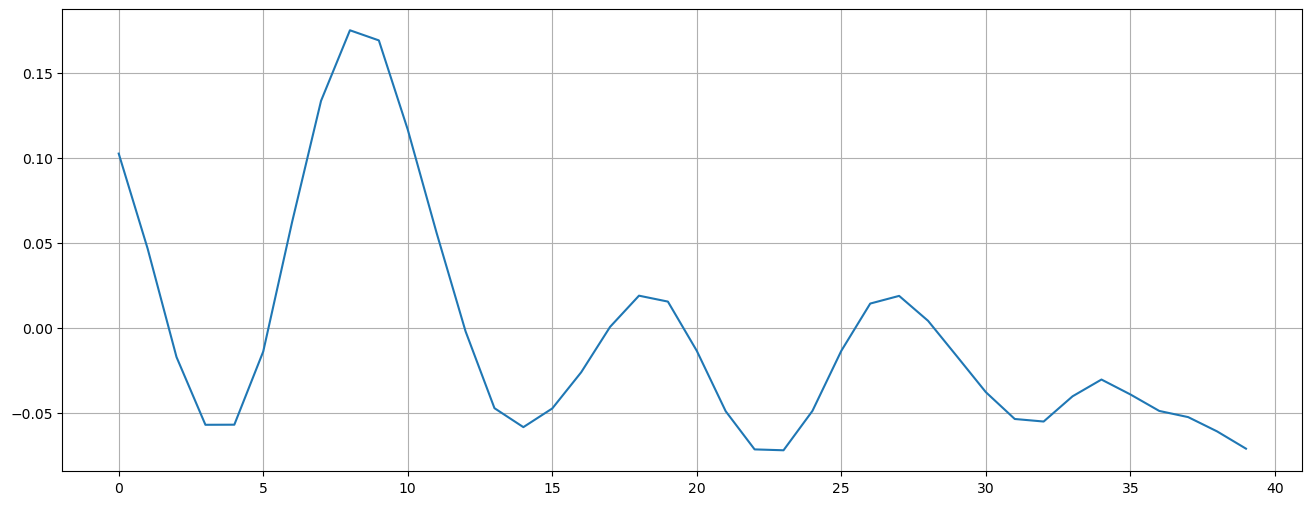

In [40]:
n0=9000
n1=9040

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

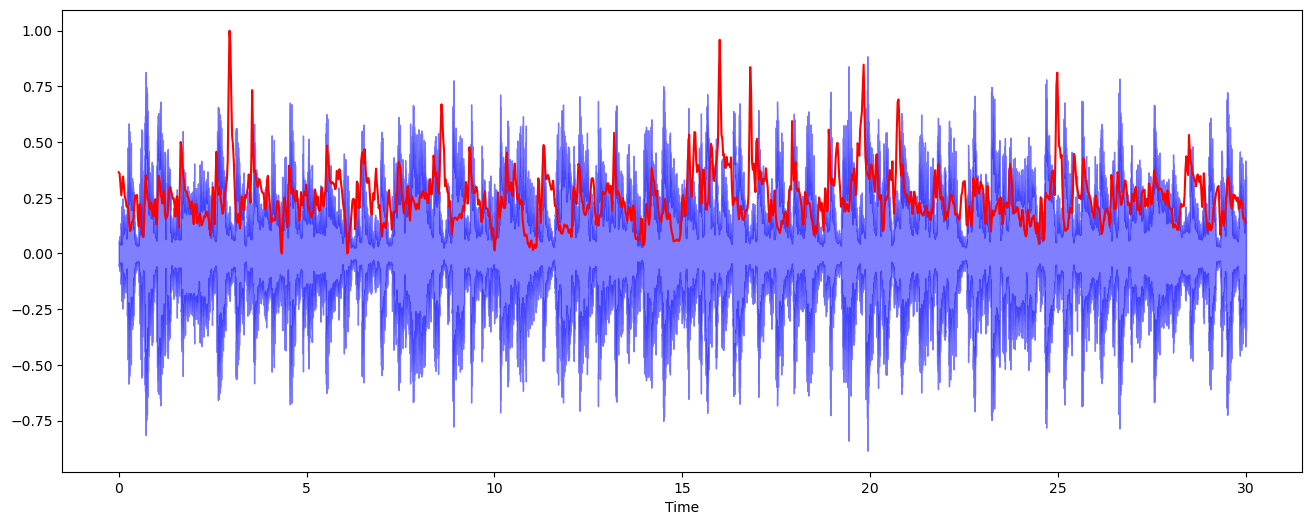

In [52]:
# Spectral Centroid (소리 무게중심)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

frames = range(len(spectral_centroids))

t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(16,6))
librosa.display.waveshow(y=y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

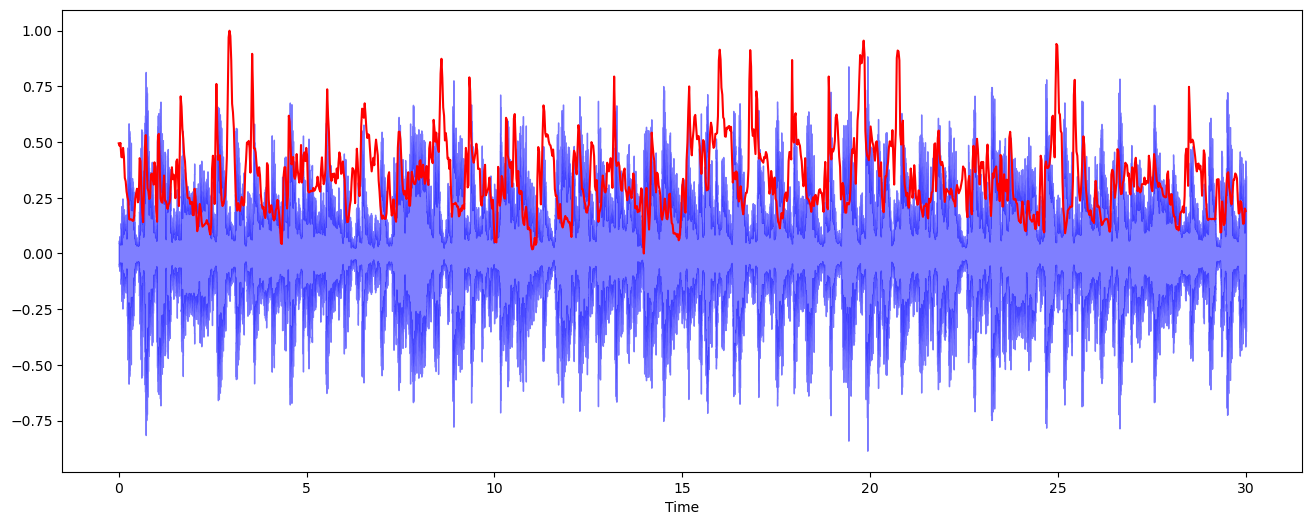

In [53]:
# 신호모양 측정
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(y=y,sr=sr,alpha=0.5,color='b')
plt.plot(t, normalize(spectral_rolloff),color='r')
plt.show()

mean: 0.51
var: 0.03


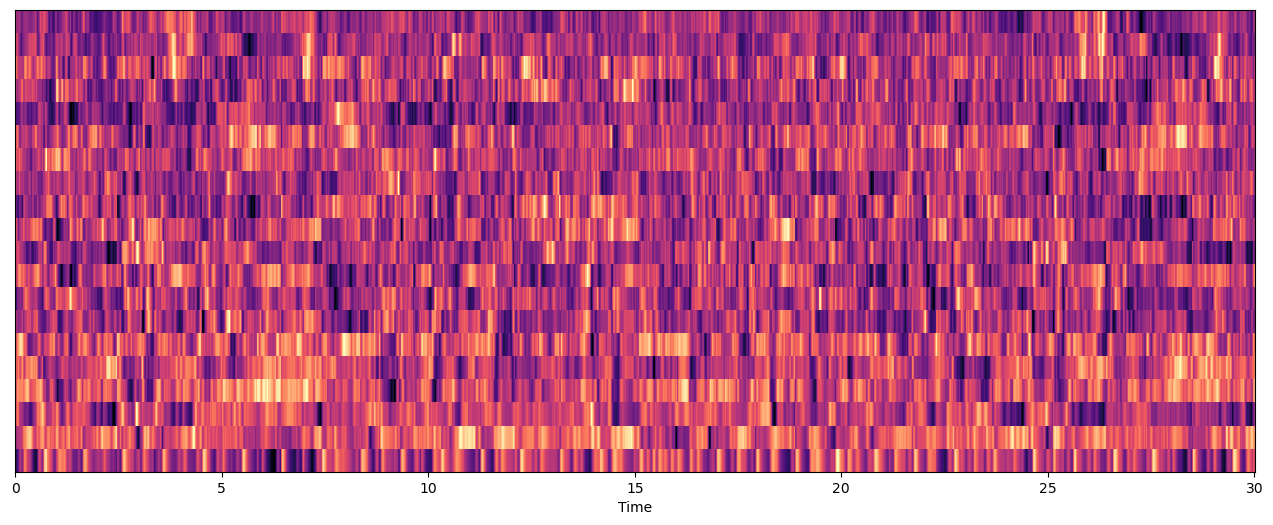

In [57]:
# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs = normalize(mfccs,axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.show()

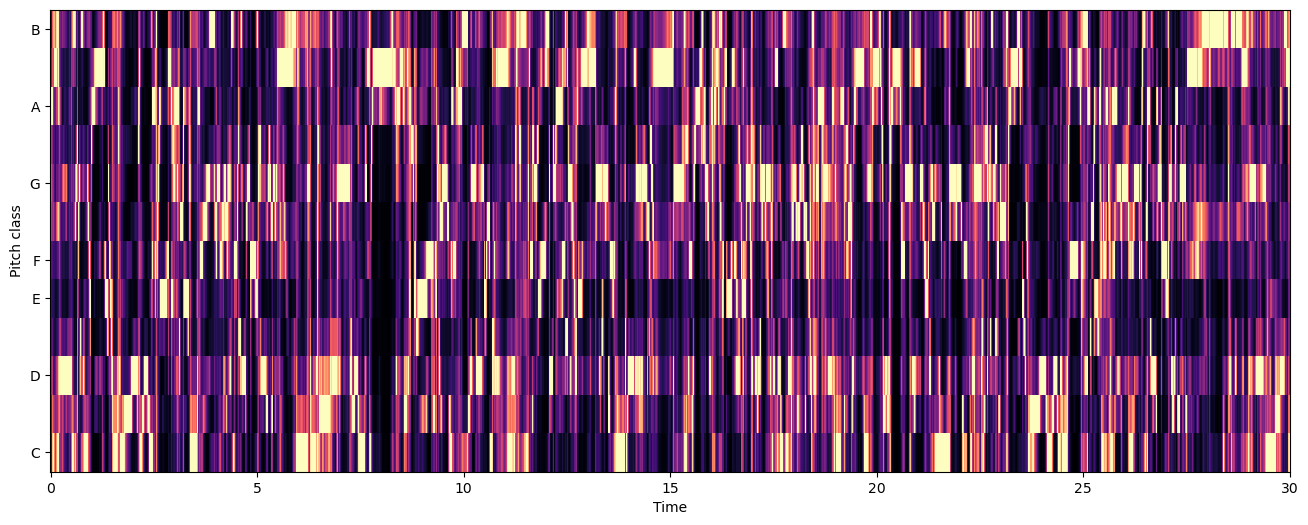

In [59]:
# Chroma Feature
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
plt.show()

### ML

In [91]:
# Data set load (csv file_30seconds)
df = pd.read_csv('./data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [92]:
# Data set preprocessing

X = df.drop(columns=['filename','length','label']) 
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [97]:
# Data Split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 57) (7992,)
(1998, 57) (1998,)


In [107]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=1
clf=KNeighborsClassifier().fit(X_train, y_train)
print(clf)

yhat=clf.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy : ', metrics.accuracy_score(y_test, yhat))


KNeighborsClassifier()
Train set Accuracy :  0.9478228228228228
Test set Accuracy :  0.9119119119119119


In [110]:
Ks=10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.93393393 0.91441441 0.91491491 0.90890891 0.91191191 0.8968969
 0.8968969  0.89489489 0.88188188]


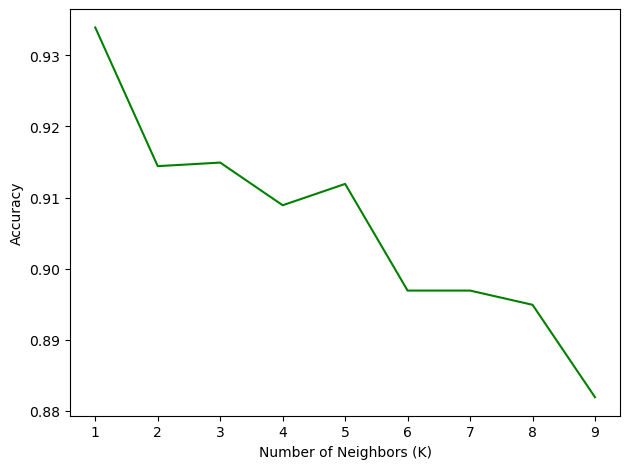

In [113]:
# KNN visualization
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [114]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.933933933933934 with k= 1
